In [1]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import re
import spacy

In [3]:
f = open('movie_review/rt-polarity.neg', encoding='ISO-8859-1')
ds = f.read()
f.close()

In [4]:
ds = ds.lower()
data = re.sub('[^a-z 0-9\n \'-/]+', '', ds)
data = re.sub('[- .]+', ' ', data)
text = data.split('\n')[:-1]
print(len(text))
#for ix in range(10)

5331


In [5]:
word_vec = spacy.load('en_vectors_web_lg')

In [6]:
q = word_vec(str(text[10]))
print(q)
#for ix in q:
#    print(ix, ix.vector.mean())

a sentimental mess that never rings true 


In [7]:
l = []

for ix in text:
    l.append(len(word_vec(str(ix))))

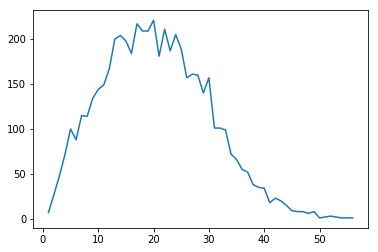

In [8]:
d = np.unique(l, return_counts=True)

plt.plot(d[0], d[1])

In [9]:
s = 0
lower_limit = 10
upper_limit = 35
for ix in range(len(d[0])):
    sl = d[0][ix]
    if sl > lower_limit and sl < upper_limit:
        s += d[1][ix]
print(s)

4079


In [10]:
def sequence_to_mat(seq):
    vec_seq = word_vec(str(seq))
    if len(vec_seq) > lower_limit and len(vec_seq) < upper_limit:
        m = np.ones((upper_limit-1, 300))*5.0
        
        for ix in range(len(vec_seq)):
            m[ix, :] = vec_seq[ix].vector
        return m
    else:
        return None

In [11]:
mat = []

for ix in text:
    seq_mat = sequence_to_mat(ix)
    
    if seq_mat is not None:
        mat.append(seq_mat)

In [12]:
mat = np.asarray(mat)
print(mat.shape)
np.save('movie_review/negative', mat)

(4079, 34, 300)
